<a href="https://colab.research.google.com/github/bintangnabiil/Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/main/Rangkuman_Chapter_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 6: Decision Tree
Decision Trees adalah salah satu algoritma machine learning yang paling intuitif dan mudah dipahami. Algoritma ini bekerja dengan cara membuat serangkaian pertanyaan binary tentang features untuk membuat prediksi. Decision trees dapat digunakan untuk klasifikasi maupun regresi, dan merupakan building block untuk algoritma ensemble yang lebih powerful seperti Random Forest dan Gradient Boosting.

##1. Training and Visualizing a Decision Tree
###Konsep Dasar
Decision Tree membuat prediksi dengan cara mengajukan serangkaian pertanyaan tentang features. Setiap internal node mewakili test pada sebuah feature, setiap branch mewakili outcome dari test tersebut, dan setiap leaf node mewakili prediksi akhir.

###Komponen Decision Tree:

- Root Node: Node paling atas yang mewakili seluruh dataset
- Internal Nodes: Node yang memiliki cabang, mewakili decision berdasarkan feature
- Leaf Nodes: Node terminal yang memberikan prediksi final
- Branches: Menghubungkan nodes berdasarkan hasil test

###Proses Training

- Split Selection: Pilih feature dan threshold yang memberikan split terbaik
- Recursive Splitting: Ulangi proses untuk setiap subset
- Stopping Criteria: Berhenti ketika kriteria tertentu terpenuhi
- Pruning: Potong cabang yang tidak perlu untuk menghindari overfitting

###Keuntungan Decision Trees

- Interpretability: Mudah dipahami dan divisualisasikan
- No Feature Scaling: Tidak memerlukan normalisasi atau scaling
- Handle Mixed Data: Dapat menangani numerical dan categorical features
- Feature Selection: Secara otomatis melakukan feature selection
- Non-parametric: Tidak membuat asumsi tentang distribusi data

##2. Making Predictions
###Proses Prediksi
Untuk membuat prediksi, decision tree mengikuti path dari root ke leaf berdasarkan feature values dari instance yang akan diprediksi. Setiap internal node menerapkan test, dan berdasarkan hasilnya, prediksi mengikuti branch yang sesuai.

###Classification Prediction:

- Leaf node berisi class yang paling frequent dalam subset tersebut
- Dapat memberikan probability estimate berdasarkan distribusi class di leaf

###Regression Prediction:

- Leaf node berisi rata-rata target values dalam subset tersebut
- Prediksi adalah nilai rata-rata dari instances yang mencapai leaf tersebut

##3. Estimating Class Probabilities
Decision trees dapat memberikan probability estimates untuk classification tasks. Probability dihitung berdasarkan rasio instances dari setiap class dalam leaf node yang relevan.

###Formula Probability:
P(class_k | instance) = (jumlah instances class_k di leaf) / (total instances di leaf)

###Karakteristik Probability:

- Probability estimates cenderung terlalu extreme (mendekati 0 atau 1)
- Kualitas probability tergantung pada jumlah instances di leaf node
- Dapat digunakan untuk threshold tuning dalam binary classification

##4. The CART Training Algorithm
###Classification and Regression Trees (CART)
CART adalah algoritma yang paling umum digunakan untuk membuat decision trees. Algoritma ini menggunakan binary splits dan dapat menangani classification maupun regression.

###Proses CART Algorithm:

- Feature Selection: Pilih feature yang memberikan split terbaik
- Threshold Selection: Tentukan threshold optimal untuk split
- Binary Split: Bagi dataset menjadi dua subset
- Recursive Application: Terapkan proses yang sama pada setiap subset
- Stopping Criteria: Berhenti berdasarkan kriteria yang ditentukan

###Splitting Criteria
###Untuk Classification:

- Gini Impurity: Mengukur seberapa "impure" suatu node

  - Gini = 1 - Σ(p_i)² dimana p_i adalah proporsi class i
  - Nilai 0 = pure (semua instances satu class)
  - Nilai maksimal = 0.5 untuk binary classification


- Entropy (Information Gain): Mengukur ketidakpastian

  - Entropy = -Σ(p_i × log₂(p_i))
  - Information Gain = Entropy(parent) - weighted average Entropy(children)

###Untuk Regression:

- Mean Squared Error (MSE): Meminimalkan variance dalam node
- Mean Absolute Error (MAE): Robust terhadap outliers

###Mathematical Formulation
###Gini Impurity:
$$Gini(S) = 1 - Σᵢ(pᵢ)²$$

###Information Gain:
$$IG(S,A) = Entropy(S) - Σᵥ(|Sᵥ|/|S| × Entropy(Sᵥ))$$

###MSE untuk Regression:
$$MSE = (1/n) × Σᵢ(yᵢ - ŷ)²$$

##5. Computational Complexity
###Training Complexity:

- Best Case: O(n × m × log(m)) dimana n = features, m = instances
- Worst Case: O(n × m²) untuk unbalanced trees
- Memory: O(m) untuk menyimpan tree structure

###Prediction Complexity:

- Time: O(log(m)) untuk balanced tree, O(m) untuk worst case
- Space: O(1) per prediction

###Scaling Characteristics:

- Training time scale relatif baik dengan ukuran dataset
- Prediction sangat cepat
- Memory requirement moderat

##6. Gini Impurity or Entropy?
###Perbandingan Criteria
###Gini Impurity:

- Pros: Komputasi lebih cepat (tidak ada logarithm)
- Pros: Cenderung menghasilkan balanced trees
- Cons: Kurang sensitive terhadap probability changes

###Entropy (Information Gain):

- Pros: Lebih sensitive terhadap changes dalam probability
- Pros: Theoretical foundation yang kuat (information theory)
- Cons: Komputasi lebih lambat karena logarithm

Praktis: Perbedaan performance biasanya minimal. Gini lebih sering digunakan karena efisiensi komputasi.

##7. Regularization Hyperparameters
Decision trees cenderung overfit, terutama jika dibiarkan tumbuh tanpa batas. Regularization hyperparameters membantu mengontrol kompleksitas tree.

###Pre-pruning Parameters (Stopping Criteria):

- max_depth: Maksimal kedalaman tree
- min_samples_split: Minimal samples untuk melakukan split
- min_samples_leaf: Minimal samples yang harus ada di leaf node
- max_leaf_nodes: Maksimal jumlah leaf nodes
- max_features: Maksimal jumlah features yang dipertimbangkan untuk split

###Post-pruning:

- ccp_alpha: Cost complexity pruning parameter
- Memotong cabang yang tidak signifikan meningkatkan generalization

###Trade-offs:

- High Regularization: Underfitting, model terlalu simple
- Low Regularization: Overfitting, model terlalu complex
- Optimal: Balance antara bias dan variance

##8. Regression Trees
Regression trees bekerja mirip dengan classification trees, tetapi memprediksi nilai kontinyu daripada class labels.

###Perbedaan Utama:

- Prediction: Rata-rata target values di leaf node
- Splitting Criterion: MSE atau MAE instead of Gini/Entropy
- Evaluation: Menggunakan regression metrics (RMSE, MAE, R²)

###Karakteristik Regression Trees:

- Menghasilkan step-wise constant predictions
- Tidak dapat mengekstrapolasi di luar range training data
- Baik untuk capturing non-linear relationships
- Sensitive terhadap outliers (terutama dengan MSE)

#Implementasi Kode

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_classification, make_regression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8')
np.random.seed(42)

##1. Basic Decision Tree Classification

1. BASIC DECISION TREE CLASSIFICATION
Decision Tree Rules:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



<ipython-input-3-9ae6d0daaaa5>:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  custom_cmap = plt.cm.get_cmap('viridis')
<ipython-input-3-9ae6d0daaaa5>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  custom_cmap2 = plt.cm.get_cmap('plasma')
<ipython-input-3-9ae6d0daaaa5>:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == cl, 0], X[y ==

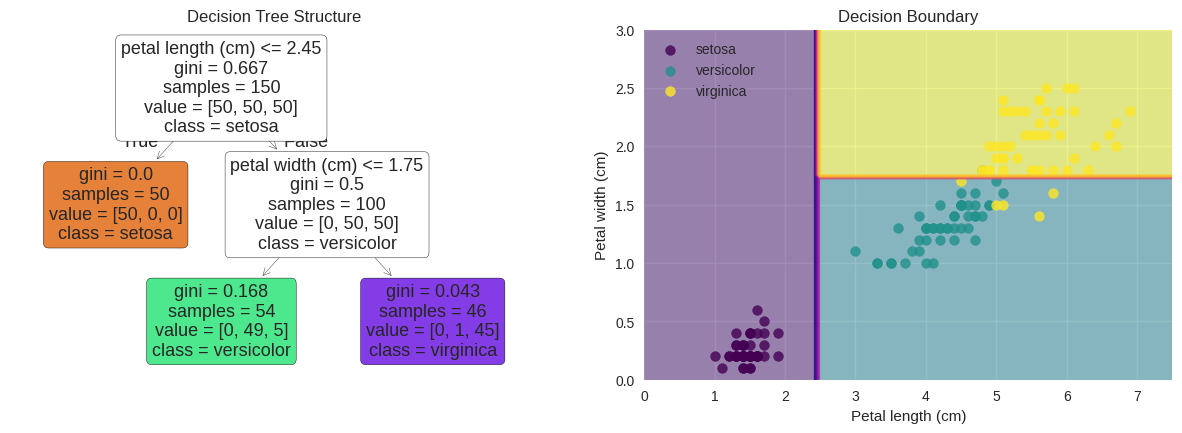

In [3]:
# 1. BASIC DECISION TREE CLASSIFICATION
print("="*50)
print("1. BASIC DECISION TREE CLASSIFICATION")
print("="*50)

# Load and prepare iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # petal length and width
y = iris.target

# Create and train decision tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(15, 10))

# Tree structure visualization
plt.subplot(2, 2, 1)
plot_tree(tree_clf, feature_names=iris.feature_names[2:],
          class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Structure")

# Decision boundary visualization
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = plt.cm.get_cmap('viridis')
    plt.contourf(x1, x2, y_pred, alpha=alpha, cmap=custom_cmap)
    if contour:
        custom_cmap2 = plt.cm.get_cmap('plasma')
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    # Plot data points
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(X[y == cl, 0], X[y == cl, 1],
                   c=custom_cmap(idx/2), s=50, alpha=0.8,
                   label=iris.target_names[cl])

plt.subplot(2, 2, 2)
plot_decision_boundary(tree_clf, X, y)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Decision Boundary")
plt.legend()

# Text representation of tree
tree_rules = export_text(tree_clf, feature_names=iris.feature_names[2:])
print("Decision Tree Rules:")
print(tree_rules)

##2. Probability Estimation

In [4]:
# 2. PROBABILITY ESTIMATION
print("\n2. PROBABILITY ESTIMATION")
print("="*30)

# Get probability estimates
X_test = [[5, 1.5]]  # Example instance
probabilities = tree_clf.predict_proba(X_test)
prediction = tree_clf.predict(X_test)

print(f"Test instance: {X_test[0]}")
print(f"Predicted class: {iris.target_names[prediction[0]]}")
print("Class probabilities:")
for i, prob in enumerate(probabilities[0]):
    print(f"  {iris.target_names[i]}: {prob:.3f}")


2. PROBABILITY ESTIMATION
Test instance: [5, 1.5]
Predicted class: versicolor
Class probabilities:
  setosa: 0.000
  versicolor: 0.907
  virginica: 0.093


##3. Comparing Splitting Criteria


3. COMPARING SPLITTING CRITERIA


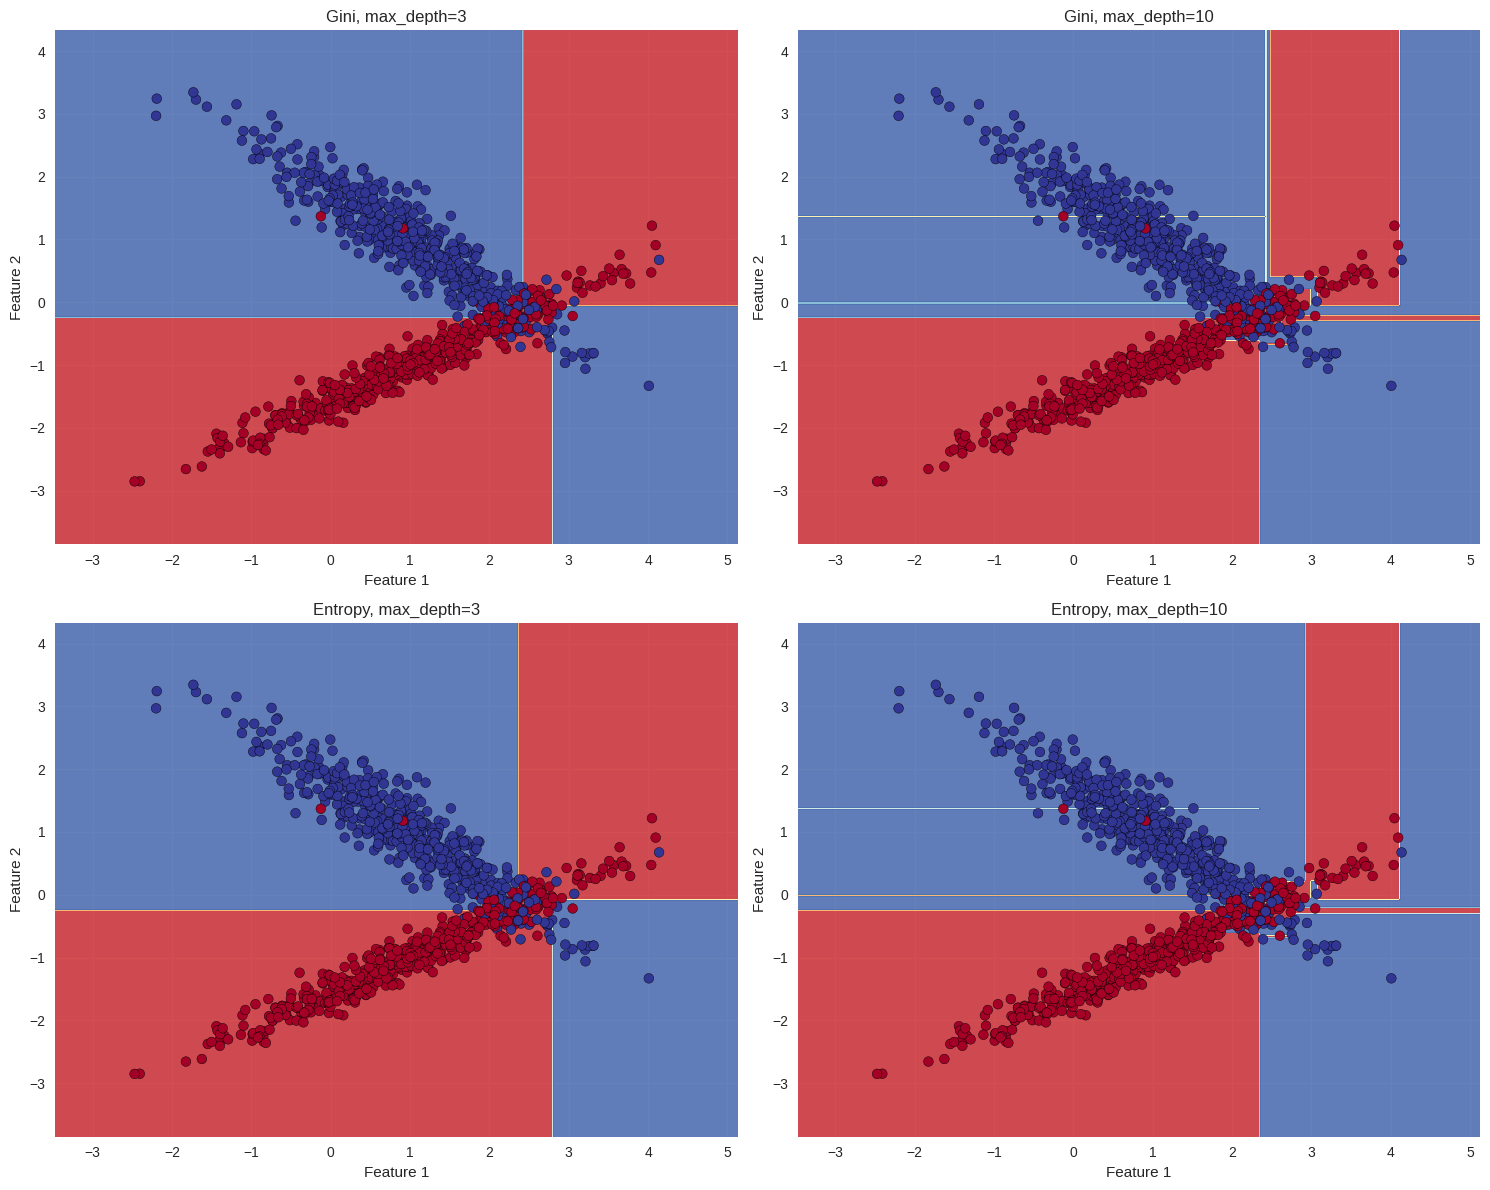

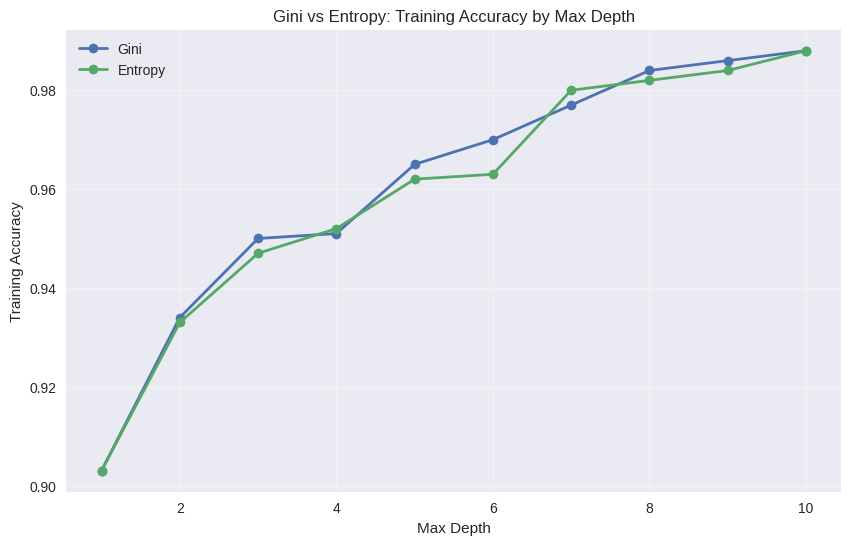

In [5]:
# 3. COMPARING SPLITTING CRITERIA
print("\n3. COMPARING SPLITTING CRITERIA")
print("="*40)

# Create larger dataset for comparison
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                          n_informative=2, n_clusters_per_class=1, random_state=42)

# Compare Gini vs Entropy
criteria = ['gini', 'entropy']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for idx, criterion in enumerate(criteria):
    # Train trees with different max_depth
    for depth in [3, 10]:
        tree = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=42)
        tree.fit(X, y)

        row = idx
        col = 0 if depth == 3 else 1

        plt.subplot(2, 2, row*2 + col + 1)

        # Plot decision boundary
        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))

        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
        plt.title(f'{criterion.capitalize()}, max_depth={depth}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Performance comparison
results = []
for criterion in criteria:
    for depth in range(1, 11):
        tree = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=42)
        tree.fit(X, y)
        score = tree.score(X, y)
        results.append({'criterion': criterion, 'max_depth': depth, 'accuracy': score})

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
for criterion in criteria:
    data = results_df[results_df['criterion'] == criterion]
    plt.plot(data['max_depth'], data['accuracy'], 'o-', label=f'{criterion.capitalize()}', linewidth=2)

plt.xlabel('Max Depth')
plt.ylabel('Training Accuracy')
plt.title('Gini vs Entropy: Training Accuracy by Max Depth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

##4. Regularization Effects


4. REGULARIZATION EFFECTS


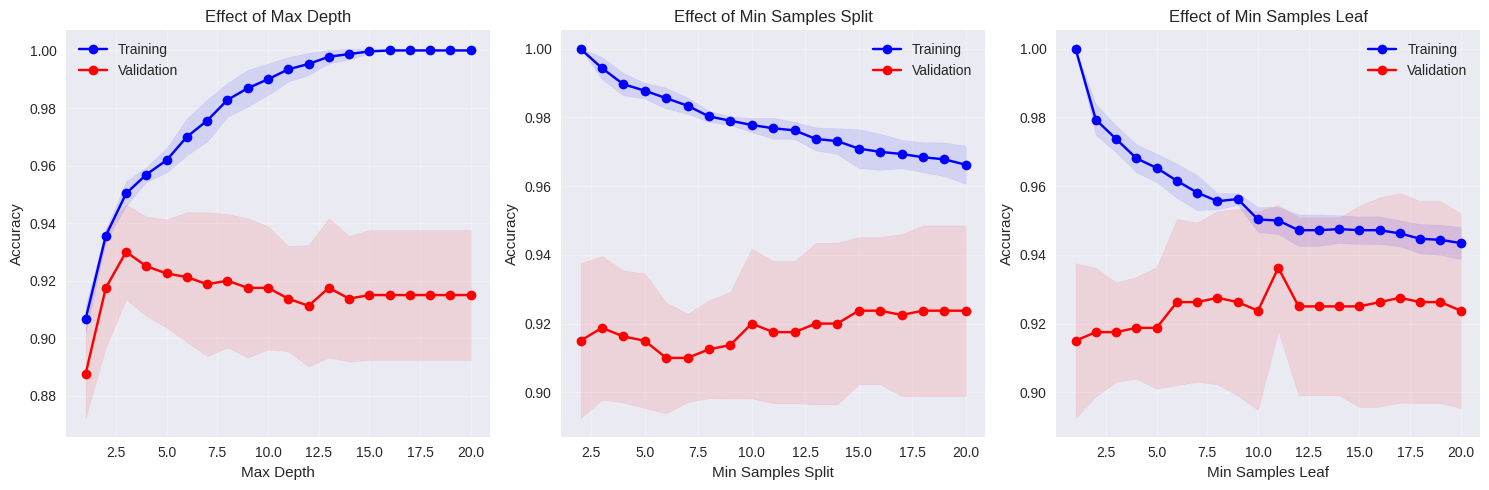

In [6]:
# 4. REGULARIZATION EFFECTS
print("\n4. REGULARIZATION EFFECTS")
print("="*30)

# Generate training and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Study effect of max_depth
max_depths = range(1, 21)
train_scores, val_scores = validation_curve(
    DecisionTreeClassifier(random_state=42), X_train, y_train,
    param_name='max_depth', param_range=max_depths,
    cv=5, scoring='accuracy'
)

plt.figure(figsize=(15, 5))

# Plot 1: Max Depth Effect
plt.subplot(1, 3, 1)
plt.plot(max_depths, train_scores.mean(axis=1), 'o-', color='blue', label='Training')
plt.fill_between(max_depths, train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.1, color='blue')
plt.plot(max_depths, val_scores.mean(axis=1), 'o-', color='red', label='Validation')
plt.fill_between(max_depths, val_scores.mean(axis=1) - val_scores.std(axis=1),
                 val_scores.mean(axis=1) + val_scores.std(axis=1), alpha=0.1, color='red')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Max Depth')
plt.legend()
plt.grid(True, alpha=0.3)

# Study effect of min_samples_split
min_samples_splits = range(2, 21)
train_scores2, val_scores2 = validation_curve(
    DecisionTreeClassifier(random_state=42), X_train, y_train,
    param_name='min_samples_split', param_range=min_samples_splits,
    cv=5, scoring='accuracy'
)

plt.subplot(1, 3, 2)
plt.plot(min_samples_splits, train_scores2.mean(axis=1), 'o-', color='blue', label='Training')
plt.fill_between(min_samples_splits, train_scores2.mean(axis=1) - train_scores2.std(axis=1),
                 train_scores2.mean(axis=1) + train_scores2.std(axis=1), alpha=0.1, color='blue')
plt.plot(min_samples_splits, val_scores2.mean(axis=1), 'o-', color='red', label='Validation')
plt.fill_between(min_samples_splits, val_scores2.mean(axis=1) - val_scores2.std(axis=1),
                 val_scores2.mean(axis=1) + val_scores2.std(axis=1), alpha=0.1, color='red')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.title('Effect of Min Samples Split')
plt.legend()
plt.grid(True, alpha=0.3)

# Study effect of min_samples_leaf
min_samples_leafs = range(1, 21)
train_scores3, val_scores3 = validation_curve(
    DecisionTreeClassifier(random_state=42), X_train, y_train,
    param_name='min_samples_leaf', param_range=min_samples_leafs,
    cv=5, scoring='accuracy'
)

plt.subplot(1, 3, 3)
plt.plot(min_samples_leafs, train_scores3.mean(axis=1), 'o-', color='blue', label='Training')
plt.fill_between(min_samples_leafs, train_scores3.mean(axis=1) - train_scores3.std(axis=1),
                 train_scores3.mean(axis=1) + train_scores3.std(axis=1), alpha=0.1, color='blue')
plt.plot(min_samples_leafs, val_scores3.mean(axis=1), 'o-', color='red', label='Validation')
plt.fill_between(min_samples_leafs, val_scores3.mean(axis=1) - val_scores3.std(axis=1),
                 val_scores3.mean(axis=1) + val_scores3.std(axis=1), alpha=0.1, color='red')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')
plt.title('Effect of Min Samples Leaf')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##5. Regression Trees


5. REGRESSION TREES


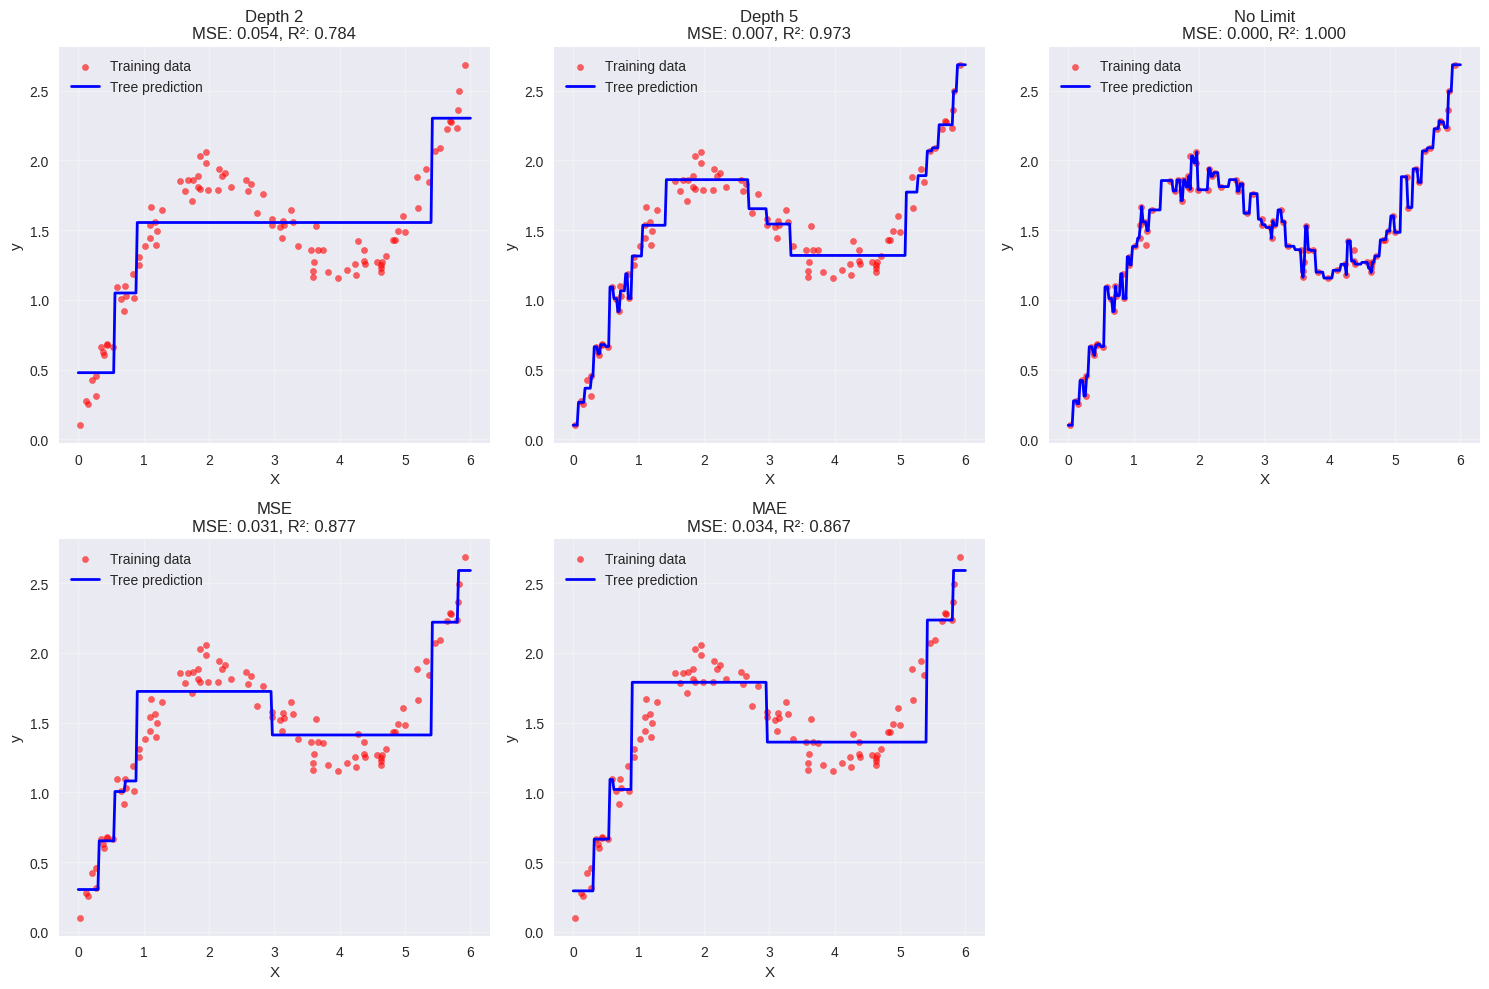

In [7]:
# 5. REGRESSION TREES
print("\n5. REGRESSION TREES")
print("="*20)

# Generate regression data
np.random.seed(42)
X_reg = np.random.rand(100, 1) * 6
y_reg = 0.5 * X_reg.ravel() + np.sin(X_reg.ravel()) + 0.1 * np.random.randn(100)

# Train regression trees with different parameters
reg_trees = {
    'Depth 2': DecisionTreeRegressor(max_depth=2, random_state=42),
    'Depth 5': DecisionTreeRegressor(max_depth=5, random_state=42),
    'No Limit': DecisionTreeRegressor(random_state=42),
    'MSE': DecisionTreeRegressor(max_depth=3, criterion='squared_error', random_state=42),
    'MAE': DecisionTreeRegressor(max_depth=3, criterion='absolute_error', random_state=42)
}

plt.figure(figsize=(15, 10))

for idx, (name, tree) in enumerate(reg_trees.items()):
    tree.fit(X_reg, y_reg)

    # Generate predictions for plotting
    X_plot = np.linspace(0, 6, 300).reshape(-1, 1)
    y_pred = tree.predict(X_plot)

    plt.subplot(2, 3, idx + 1)
    plt.scatter(X_reg, y_reg, c='red', s=20, alpha=0.6, label='Training data')
    plt.plot(X_plot, y_pred, color='blue', linewidth=2, label='Tree prediction')

    # Calculate and display metrics
    y_train_pred = tree.predict(X_reg)
    mse = mean_squared_error(y_reg, y_train_pred)
    r2 = r2_score(y_reg, y_train_pred)

    plt.title(f'{name}\nMSE: {mse:.3f}, R²: {r2:.3f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


##6. Feature Importance


6. FEATURE IMPORTANCE


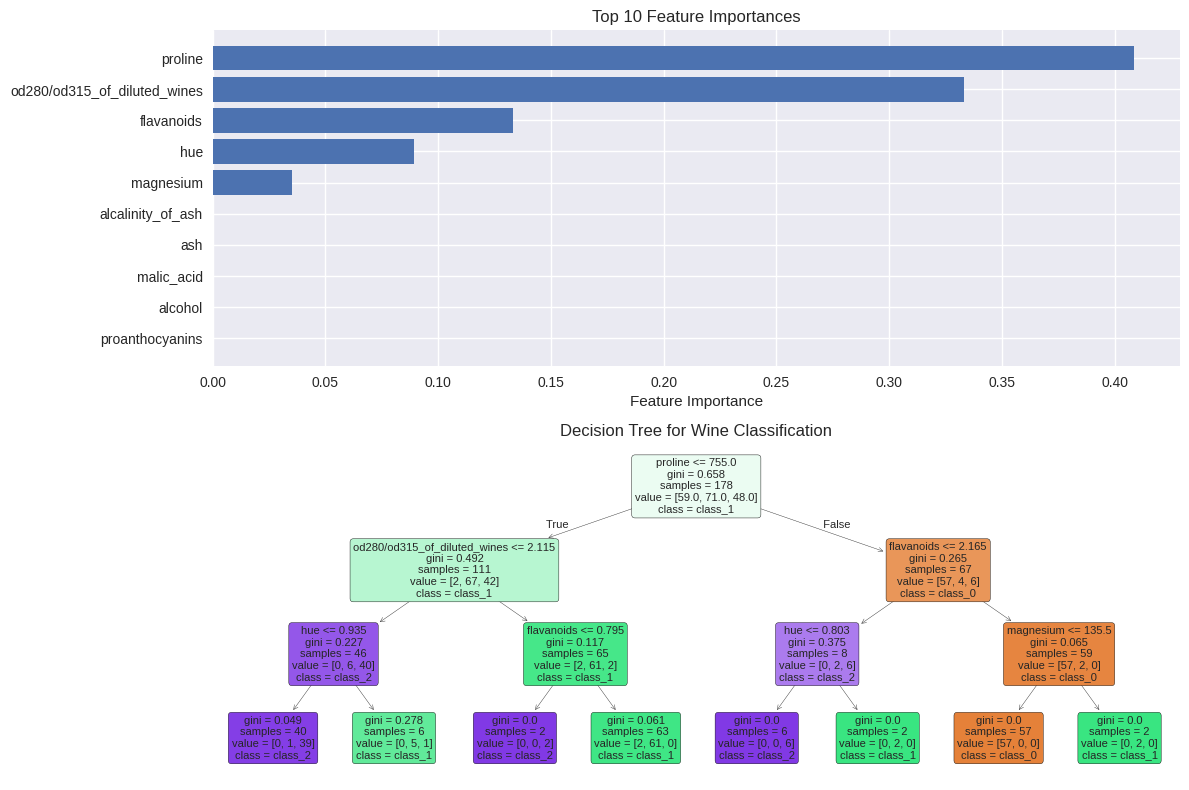

Top 10 Most Important Features:
                     feature  importance
                     proline    0.408586
od280/od315_of_diluted_wines    0.333349
                  flavanoids    0.133327
                         hue    0.089508
                   magnesium    0.035230
           alcalinity_of_ash    0.000000
                         ash    0.000000
                  malic_acid    0.000000
                     alcohol    0.000000
             proanthocyanins    0.000000


In [8]:
# 6. FEATURE IMPORTANCE
print("\n6. FEATURE IMPORTANCE")
print("="*25)

# Load a dataset with multiple features
from sklearn.datasets import load_wine

wine = load_wine()
X_wine, y_wine = wine.data, wine.target

# Train decision tree
tree_wine = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_wine.fit(X_wine, y_wine)

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': wine.feature_names,
    'importance': tree_wine.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
top_features = feature_importance.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()

# Visualize tree with feature names
plt.subplot(2, 1, 2)
plot_tree(tree_wine, feature_names=wine.feature_names,
          class_names=wine.target_names, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree for Wine Classification")

plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

##7. Hyperparameter Tuning

In [9]:
# 7. HYPERPARAMETER TUNING
print("\n7. HYPERPARAMETER TUNING")
print("="*30)

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid search
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("Performing Grid Search...")
grid_search.fit(X_wine, y_wine)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Analyze results
results_df = pd.DataFrame(grid_search.cv_results_)
print(f"\nTop 5 parameter combinations:")
top_5 = results_df.nlargest(5, 'mean_test_score')[['params', 'mean_test_score', 'std_test_score']]
for idx, row in top_5.iterrows():
    print(f"{row['mean_test_score']:.4f} (+/-{row['std_test_score']*2:.4f}) {row['params']}")



7. HYPERPARAMETER TUNING
Performing Grid Search...
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9103

Top 5 parameter combinations:
0.9103 (+/-0.0958) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9103 (+/-0.0958) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.9103 (+/-0.0958) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.9103 (+/-0.0958) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.9103 (+/-0.0958) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}


##8. Decision Tree Instability Demonstration


8. DECISION TREE INSTABILITY


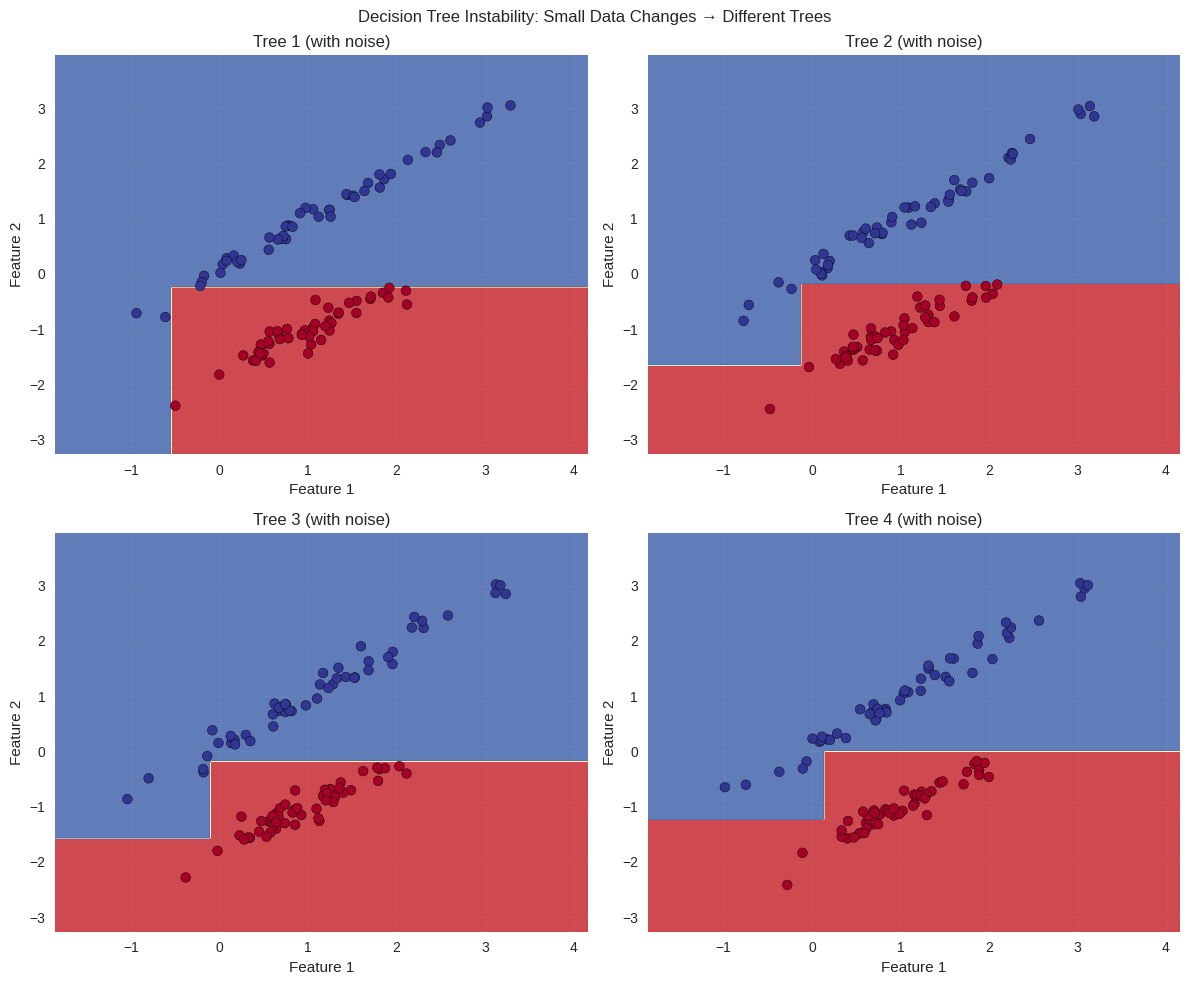


SUMMARY OF KEY POINTS:
1. Decision Trees make predictions via series of binary decisions
2. CART algorithm uses Gini impurity or entropy for splitting
3. Trees are prone to overfitting without regularization
4. Key hyperparameters: max_depth, min_samples_split/leaf
5. Trees provide natural feature importance ranking
6. Regression trees predict continuous values using averages
7. Trees are interpretable but can be unstable
8. No feature scaling required


In [10]:
# 8. DECISION TREE INSTABILITY DEMONSTRATION
print("\n8. DECISION TREE INSTABILITY")
print("="*35)

# Show how small changes in data can lead to very different trees
X_unstable, y_unstable = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                          n_informative=2, n_clusters_per_class=1, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i in range(4):
    # Add small random noise to create slightly different datasets
    X_noisy = X_unstable + np.random.normal(0, 0.1, X_unstable.shape)

    tree = DecisionTreeClassifier(max_depth=5, random_state=42)
    tree.fit(X_noisy, y_unstable)

    ax = axes[i//2, i%2]

    # Plot decision boundary
    h = 0.02
    x_min, x_max = X_unstable[:, 0].min() - 1, X_unstable[:, 0].max() + 1
    y_min, y_max = X_unstable[:, 1].min() - 1, X_unstable[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    scatter = ax.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_unstable,
                        cmap=plt.cm.RdYlBu, edgecolors='black')
    ax.set_title(f'Tree {i+1} (with noise)')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.suptitle('Decision Tree Instability: Small Data Changes → Different Trees')
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("SUMMARY OF KEY POINTS:")
print("="*50)
print("1. Decision Trees make predictions via series of binary decisions")
print("2. CART algorithm uses Gini impurity or entropy for splitting")
print("3. Trees are prone to overfitting without regularization")
print("4. Key hyperparameters: max_depth, min_samples_split/leaf")
print("5. Trees provide natural feature importance ranking")
print("6. Regression trees predict continuous values using averages")
print("7. Trees are interpretable but can be unstable")
print("8. No feature scaling required")